In [1]:
import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt      # MATLAB like plotting routines
import random                        # for generating random numbers

from tensorflow.python.keras.layers import Input, Dense   #needed for older version of TF. Newer TF drops .python
from tensorflow.python.keras.datasets import mnist     # MNIST dataset is included in Keras
from tensorflow.python.keras.models import Sequential  # Model type to be used
from tensorflow.python.keras.layers import Dense, Dropout, Activation # Types of layers to be used in our model
from tensorflow.python.keras import utils                         # NumPy related tools


In [2]:
# The MNIST data is split between 60,000 28 x 28 pixel training images and 10,000 28 x 28 pixel images

(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


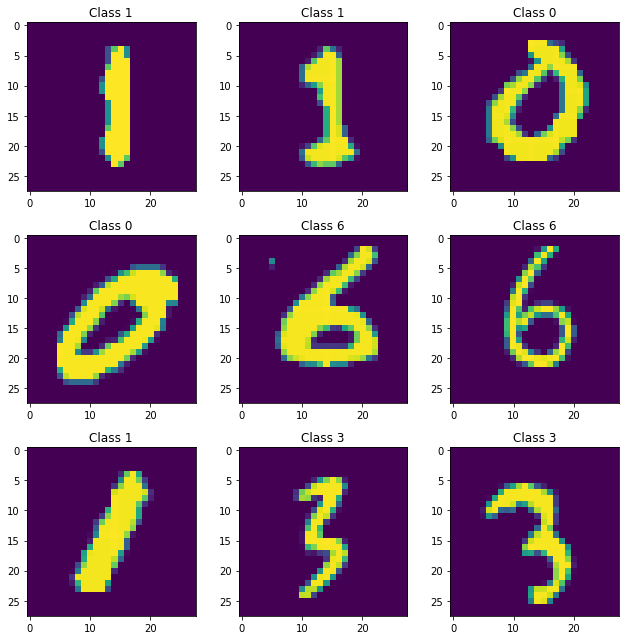

In [3]:
# View some of the images

plt.rcParams['figure.figsize'] = (9,9) # Make the figures a bit bigger

for i in range(9):
    plt.subplot(3,3,i+1)
    num = random.randint(0, len(X_train))
    #plt.imshow(X_train[num], cmap='gray', interpolation='none')
    plt.imshow(X_train[num].reshape(28,28))
    plt.title("Class {}".format(y_train[num]))
    
plt.tight_layout()

In [4]:
# just a little function for pretty printing a matrix of one image

def matprint(mat, fmt="g"):
    col_maxes = [max([len(("{:"+fmt+"}").format(x)) for x in col]) for col in mat.T]
    for x in mat:
        for i, y in enumerate(x):
            print(("{:"+str(col_maxes[i])+fmt+"}").format(y), end="  ")
        print("")

# now print!        
matprint(X_train[num])

0  0  0  0  0   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   0  0  0  0  0  0  0  0  
0  0  0  0  0   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   0  0  0  0  0  0  0  0  
0  0  0  0  0   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   0  0  0  0  0  0  0  0  
0  0  0  0  0   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   0  0  0  0  0  0  0  0  
0  0  0  0  0   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   0  0  0  0  0  0  0  0  
0  0  0  0  0   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   0  0  0  0  0  0  0  0  
0  0  0  0  0   0    0    0    8   78  148  218  253  193   69   22    0    0    0    0   0  0  0  0  0  0  0  0  
0  0  0  0  0   0    0    0  157  252  252  252  252  253  252  221  120   14    0    0   0  0  0  0  0  0  0  0  
0  0  0  0  0   0    6  153  253  252  252  252  252  253  252  252  252   42   

In [5]:
#reshape & normalize

X_train = X_train.reshape(60000, 784) # reshape 60,000 28 x 28 matrices into 60,000 784-length vectors.
X_test = X_test.reshape(10000, 784)   # reshape 10,000 28 x 28 matrices into 10,000 784-length vectors.

X_train = X_train.astype('float32')   # change integers to 32-bit floating point numbers
X_test = X_test.astype('float32')

X_train /= 255                        # normalize each value for each pixel for the entire vector for each input
X_test /= 255

print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


In [6]:
# convert to one hots

nb_classes = 10 # number of unique digits

Y_train = utils.to_categorical(y_train, nb_classes)
Y_test = utils.to_categorical(y_test, nb_classes)

In [7]:
#view a little data 

print (num)
print (Y_train[num])

44032
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [8]:
#define model structure


model = Sequential()

# The first hidden layer is a set of 512 nodes (artificial neurons).
# Each node will receive an element from each input vector and apply some weight and bias to it.
model.add(Dense(512, input_shape=(784,))) #(784,) is not a typo -- that represents a 784 length vector!

# An "activation" is a non-linear function applied to the output of the layer above.
# It checks the new value of the node, and decides whether that artifical neuron has fired.
# The Rectified Linear Unit (ReLU) converts all negative inputs to nodes in the next layer to be zero.
# Those inputs are then not considered to be fired.
# Positive values of a node are unchanged.
model.add(Activation('relu'))


# The second hidden layer appears identical to our first layer.
# However, instead of each of the 512-node receiving 784-inputs from the input image data,
# they receive 512 inputs from the output of the first 512-node layer.
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

# The final layer of 10 neurons in fully-connected to the previous 512-node layer.
# The final layer of a FCN should be equal to the number of desired classes (10 in this case).
model.add(Dense(10))

# The "softmax" activation represents a probability distribution over K different possible outcomes.
# Its values are all non-negative and sum to 1.
model.add(Activation('softmax'))

# Summarize the built model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
activation_2 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
_________________________________________________________________
activation_3 (Activation)    (None, 10)                0         
Total para

In [9]:
#Define optimizer and loss function

# Let's use the Adam optimizer for learning
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [10]:
#Train the model!
model.fit(X_train, Y_train,
          batch_size=128, epochs=5,
          verbose=1)

Epoch 1/5
60000/60000 [==============================]60000/60000 [==============================] - 7s 122us/step - loss: 0.2309 - acc: 0.9293

Epoch 2/5
60000/60000 [==============================]60000/60000 [==============================] - 7s 117us/step - loss: 0.0848 - acc: 0.9742

Epoch 3/5
60000/60000 [==============================]60000/60000 [==============================] - 7s 117us/step - loss: 0.0532 - acc: 0.9828

Epoch 4/5
60000/60000 [==============================]60000/60000 [==============================] - 7s 116us/step - loss: 0.0384 - acc: 0.9879

Epoch 5/5
60000/60000 [==============================]60000/60000 [==============================] - 7s 116us/step - loss: 0.0318 - acc: 0.9897



In [11]:
#Evaluate Model's Accuracy on Test Data
score = model.evaluate(X_test, Y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

10000/10000 [==============================]10000/10000 [==============================] - 1s 77us/step

Test score: 0.07180572716790776
Test accuracy: 0.979


In [12]:
# The predict_classes function outputs the highest probability class
# according to the trained classifier for each input example.
predicted_classes = model.predict_classes(X_test)

# Check which items we got right / wrong
correct_indices = np.nonzero(predicted_classes == y_test)[0]

incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

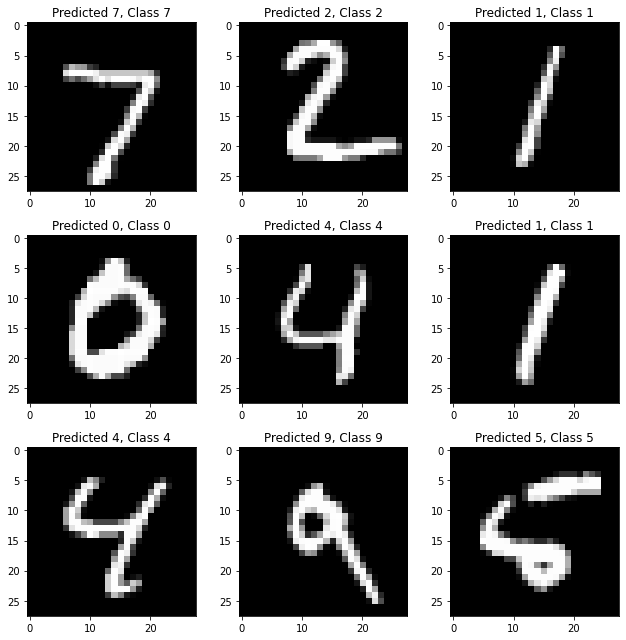

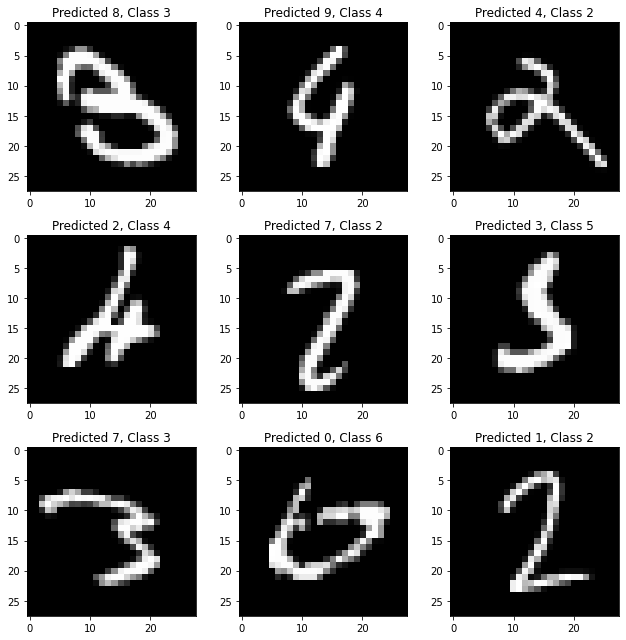

In [13]:
plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))
    
plt.tight_layout()
    
plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))
    
plt.tight_layout()

In [ ]:
# model = keras.Sequential(
#     [
#         keras.Input(shape=input_shape),
#         tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
#         tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
#         tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
#         tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
#         tf.keras.layers.Flatten(),
#         tf.keras.layers.Dropout(0.5),
#         tf.keras.layers.Dense(num_classes, activation="softmax"),
#     ]
# )

# model.summary()